In [1]:
import numpy as np 
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Problem statment

Predict the species of Iris flower

# 2. Data Gathering

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Here all features are in float and no missiing values

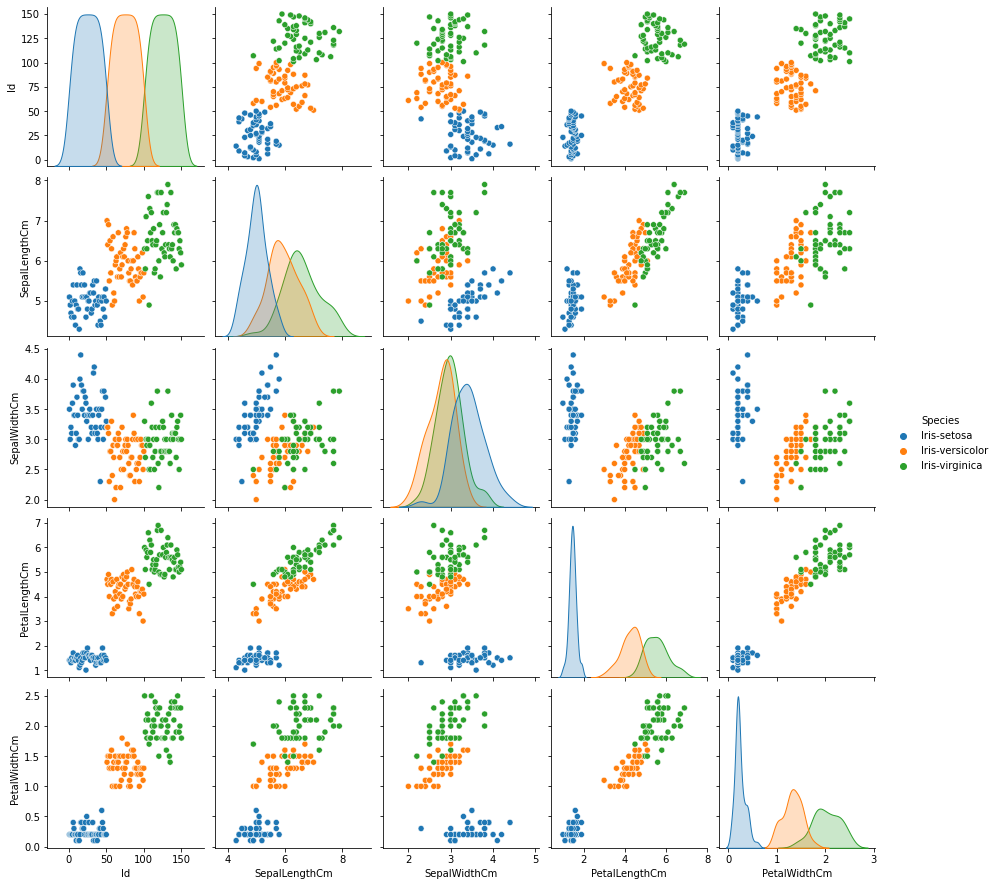

In [6]:
vis = df
sns.pairplot(vis,hue='Species')

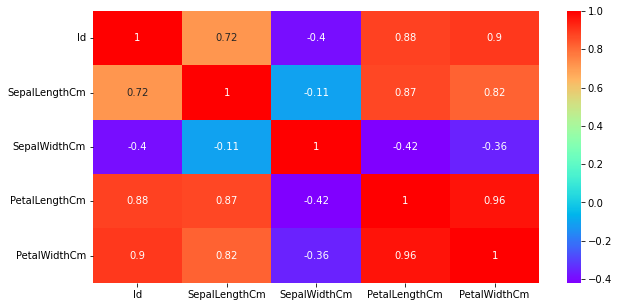

In [7]:
plt.figure(figsize = (10,5))
sns.heatmap(vis.corr(), annot = True, cmap="rainbow")
plt.show()

In [8]:
vis['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## cheking for outliers

In [9]:
df = df.drop('Id',axis=1)

In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### 1. sepal length (cm)

<AxesSubplot:xlabel='SepalLengthCm'>

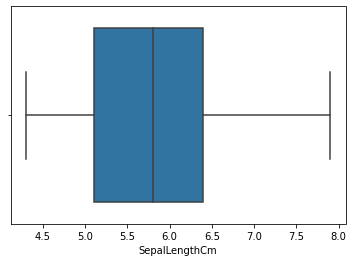

In [11]:
sns.boxplot(data=df,x='SepalLengthCm')

### 2.sepal width (cm)

<AxesSubplot:xlabel='SepalWidthCm'>

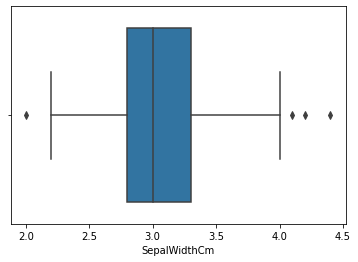

In [12]:
sns.boxplot(data=df,x='SepalWidthCm')

In [13]:
q1 = df["SepalWidthCm"].quantile(0.25)
q2 = df["SepalWidthCm"].quantile(0.50)
q3 = df["SepalWidthCm"].quantile(0.75)

median = df["SepalWidthCm"].median()

print("Q1",q1)
print("Q2",q2)
print("Q3",q3)
print("Median",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 2.8
Q2 3.0
Q3 3.3
Median 3.0
Upper Tail : 4.05
Lower Tail : 2.05


In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
median_width = df.loc[(df["SepalWidthCm"] <= upper_tail) & 
                            (df["SepalWidthCm"] >= lower_tail),'SepalWidthCm'].median()
median_width

3.0

In [16]:
df.loc[(df["SepalWidthCm"] > upper_tail) |
                            (df["SepalWidthCm"] < lower_tail),'SepalWidthCm']

15    4.4
32    4.1
33    4.2
60    2.0
Name: SepalWidthCm, dtype: float64

In [17]:
df.loc[(df["SepalWidthCm"] > upper_tail) |
                            (df["SepalWidthCm"] < lower_tail),'SepalWidthCm']=median_width

In [18]:
df.loc[(df["SepalWidthCm"] > upper_tail) |
                            (df["SepalWidthCm"] < lower_tail),'SepalWidthCm']

Series([], Name: SepalWidthCm, dtype: float64)

### 3.petal length (cm)

<AxesSubplot:xlabel='PetalLengthCm'>

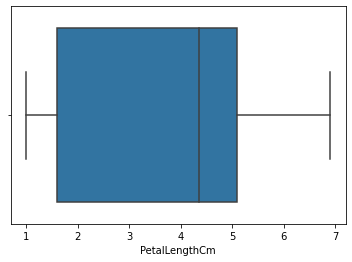

In [19]:
sns.boxplot(data=df,x='PetalLengthCm')

### 4.petal width (cm)

<AxesSubplot:xlabel='PetalWidthCm'>

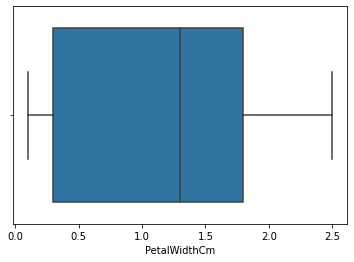

In [20]:
sns.boxplot(data=df,x='PetalWidthCm')

# 4. Model Training

In [21]:
x = df.drop('Species',axis= 1)
y = df['Species']

In [22]:
norm = MinMaxScaler()
array = norm.fit_transform(x)
array

array([[0.22222222, 0.72222222, 0.06779661, 0.04166667],
       [0.16666667, 0.44444444, 0.06779661, 0.04166667],
       [0.11111111, 0.55555556, 0.05084746, 0.04166667],
       [0.08333333, 0.5       , 0.08474576, 0.04166667],
       [0.19444444, 0.77777778, 0.06779661, 0.04166667],
       [0.30555556, 0.94444444, 0.11864407, 0.125     ],
       [0.08333333, 0.66666667, 0.06779661, 0.08333333],
       [0.19444444, 0.66666667, 0.08474576, 0.04166667],
       [0.02777778, 0.38888889, 0.06779661, 0.04166667],
       [0.16666667, 0.5       , 0.08474576, 0.        ],
       [0.30555556, 0.83333333, 0.08474576, 0.04166667],
       [0.13888889, 0.66666667, 0.10169492, 0.04166667],
       [0.13888889, 0.44444444, 0.06779661, 0.        ],
       [0.        , 0.44444444, 0.01694915, 0.        ],
       [0.41666667, 1.        , 0.03389831, 0.04166667],
       [0.38888889, 0.44444444, 0.08474576, 0.125     ],
       [0.30555556, 0.94444444, 0.05084746, 0.125     ],
       [0.22222222, 0.72222222,

In [23]:
x =  pd.DataFrame(array,columns=x.columns)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.722222,0.067797,0.041667
1,0.166667,0.444444,0.067797,0.041667
2,0.111111,0.555556,0.050847,0.041667
3,0.083333,0.500000,0.084746,0.041667
4,0.194444,0.777778,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667
146,0.555556,0.166667,0.677966,0.750000
147,0.611111,0.444444,0.711864,0.791667
148,0.527778,0.666667,0.745763,0.916667


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45,stratify=y)

# 1. Logistic Reg

In [25]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [26]:
# Testing data accuracy

y_pred = log_reg.predict(x_test)

mul_cnf_mat = multilabel_confusion_matrix(y_test,y_pred)
print("multilabel_confusion_matrix:\n",mul_cnf_mat)

acc_score = accuracy_score(y_test,y_pred)
print("Acuracy score is ",acc_score)

clf_report_test = classification_report (y_test,y_pred)
print("classification_report is : \n ",clf_report_test)

multilabel_confusion_matrix:
 [[[26  0]
  [ 0 12]]

 [[23  2]
  [ 1 12]]

 [[24  1]
  [ 2 11]]]
Acuracy score is  0.9210526315789473
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.92      0.85      0.88        13

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38



In [27]:
#training data accuracy

y_pred_train = log_reg.predict(x_train)

mult_cnf_mat_train = multilabel_confusion_matrix(y_train,y_pred_train)
print("multilabel_confusion_matrix:\n",mult_cnf_mat_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Acuracy score is ",acc_score)

clf_report_train = classification_report (y_train,y_pred_train)
print("classification_report is : \n ",clf_report_train)


multilabel_confusion_matrix:
 [[[74  0]
  [ 0 38]]

 [[73  2]
  [ 7 30]]

 [[68  7]
  [ 2 35]]]
Acuracy score is  0.9196428571428571
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.94      0.81      0.87        37
 Iris-virginica       0.83      0.95      0.89        37

       accuracy                           0.92       112
      macro avg       0.92      0.92      0.92       112
   weighted avg       0.92      0.92      0.92       112



# 2. KNN

In [28]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
# Testing data accuracy

y_pred = knn_clf.predict(x_test)

mul_cnf_mat = multilabel_confusion_matrix(y_test,y_pred)
print("multilabel_confusion_matrix:\n",mul_cnf_mat)

acc_score = accuracy_score(y_test,y_pred)
print("Acuracy score is ",acc_score)

clf_report_test = classification_report (y_test,y_pred)
print("classification_report is : \n ",clf_report_test)

multilabel_confusion_matrix:
 [[[26  0]
  [ 0 12]]

 [[23  2]
  [ 0 13]]

 [[25  0]
  [ 2 11]]]
Acuracy score is  0.9473684210526315
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [30]:
#training data accuracy

y_pred_train = knn_clf.predict(x_train)

mult_cnf_mat_train = multilabel_confusion_matrix(y_train,y_pred_train)
print("multilabel_confusion_matrix:\n",mult_cnf_mat_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Acuracy score is ",acc_score)

clf_report_train = classification_report (y_train,y_pred_train)
print("classification_report is : \n ",clf_report_train)

multilabel_confusion_matrix:
 [[[74  0]
  [ 0 38]]

 [[73  2]
  [ 2 35]]

 [[73  2]
  [ 2 35]]]
Acuracy score is  0.9642857142857143
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.95      0.95      0.95        37
 Iris-virginica       0.95      0.95      0.95        37

       accuracy                           0.96       112
      macro avg       0.96      0.96      0.96       112
   weighted avg       0.96      0.96      0.96       112



# 3. Decision Tree

In [31]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
# Testing data accuracy

y_pred = dt_clf.predict(x_test)

mul_cnf_mat = multilabel_confusion_matrix(y_test,y_pred)
print("multilabel_confusion_matrix:\n",mul_cnf_mat)

acc_score = accuracy_score(y_test,y_pred)
print("Acuracy score is ",acc_score)

clf_report_test = classification_report (y_test,y_pred)
print("classification_report is : \n ",clf_report_test)

multilabel_confusion_matrix:
 [[[26  0]
  [ 0 12]]

 [[23  2]
  [ 0 13]]

 [[25  0]
  [ 2 11]]]
Acuracy score is  0.9473684210526315
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [33]:
#training data accuracy

y_pred_train = dt_clf.predict(x_train)

mult_cnf_mat_train = multilabel_confusion_matrix(y_train,y_pred_train)
print("multilabel_confusion_matrix:\n",mult_cnf_mat_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Acuracy score is ",acc_score)

clf_report_train = classification_report (y_train,y_pred_train)
print("classification_report is : \n ",clf_report_train)

multilabel_confusion_matrix:
 [[[74  0]
  [ 0 38]]

 [[75  0]
  [ 0 37]]

 [[75  0]
  [ 0 37]]]
Acuracy score is  1.0
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



In [34]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf,feature_names=x.columns,class_names=["setosa","versicolor","virginica"],filled=True)
print()

## Hyperparameter tunning

In [35]:
model = DecisionTreeClassifier(random_state=10)
hyperpara = {'criterion':['gini','entropy'],
    "max_depth":np.arange(1,10),
    "min_samples_split" : np.arange(1,5),
    "min_samples_leaf" : np.arange(1,10)}
rscv_dt = RandomizedSearchCV(model,hyperpara,cv=5)
rscv_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4])})

In [36]:
dt_clf_hyp = rscv_dt.best_estimator_
dt_clf_hyp.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=4, random_state=10)

In [37]:
# Testing data accuracy

y_pred = dt_clf_hyp.predict(x_test)

mul_cnf_mat = multilabel_confusion_matrix(y_test,y_pred)
print("multilabel_confusion_matrix:\n",mul_cnf_mat)

acc_score = accuracy_score(y_test,y_pred)
print("Acuracy score is ",acc_score)

clf_report_test = classification_report (y_test,y_pred)
print("classification_report is : \n ",clf_report_test)

multilabel_confusion_matrix:
 [[[26  0]
  [ 0 12]]

 [[23  2]
  [ 0 13]]

 [[25  0]
  [ 2 11]]]
Acuracy score is  0.9473684210526315
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [38]:
#training data accuracy

y_pred_train = dt_clf_hyp.predict(x_train)

mult_cnf_mat_train = multilabel_confusion_matrix(y_train,y_pred_train)
print("multilabel_confusion_matrix:\n",mult_cnf_mat_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Acuracy score is ",acc_score)

clf_report_train = classification_report (y_train,y_pred_train)
print("classification_report is : \n ",clf_report_train)

multilabel_confusion_matrix:
 [[[74  0]
  [ 0 38]]

 [[72  3]
  [ 1 36]]

 [[74  1]
  [ 3 34]]]
Acuracy score is  0.9642857142857143
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.92      0.97      0.95        37
 Iris-virginica       0.97      0.92      0.94        37

       accuracy                           0.96       112
      macro avg       0.96      0.96      0.96       112
   weighted avg       0.97      0.96      0.96       112



# 4. RandomForest

In [39]:
rdf = RandomForestClassifier()
rdf.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
# Testing data accuracy

y_pred = rdf.predict(x_test)

mul_cnf_mat = multilabel_confusion_matrix(y_test,y_pred)
print("multilabel_confusion_matrix:\n",mul_cnf_mat)

acc_score = accuracy_score(y_test,y_pred)
print("Acuracy score is ",acc_score)

clf_report_test = classification_report (y_test,y_pred)
print("classification_report is : \n ",clf_report_test)

multilabel_confusion_matrix:
 [[[26  0]
  [ 0 12]]

 [[23  2]
  [ 0 13]]

 [[25  0]
  [ 2 11]]]
Acuracy score is  0.9473684210526315
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [41]:
#training data accuracy

y_pred_train = rdf.predict(x_train)

mult_cnf_mat_train = multilabel_confusion_matrix(y_train,y_pred_train)
print("multilabel_confusion_matrix:\n",mult_cnf_mat_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Acuracy score is ",acc_score)

clf_report_train = classification_report (y_train,y_pred_train)
print("classification_report is : \n ",clf_report_train)

multilabel_confusion_matrix:
 [[[74  0]
  [ 0 38]]

 [[75  0]
  [ 0 37]]

 [[75  0]
  [ 0 37]]]
Acuracy score is  1.0
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



## Hyperparameter Tunning

In [42]:
rf_model = RandomForestClassifier()
rf_hyp = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'max_features':['sqrt'],
                   'random_state':[11]}
rscv_rf = RandomizedSearchCV(rf_model,rf_hyp,cv=5)
rscv_rf.fit(x_train,y_train)
rscv_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=15,
                       n_estimators=16, random_state=11)

In [43]:
rf_hyp_model = rscv_rf.best_estimator_
rf_hyp_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=15,
                       n_estimators=16, random_state=11)

In [44]:
# Testing data accuracy

y_pred = rf_hyp_model.predict(x_test)

mul_cnf_mat = multilabel_confusion_matrix(y_test,y_pred)
print("multilabel_confusion_matrix:\n",mul_cnf_mat)

acc_score = accuracy_score(y_test,y_pred)
print("Acuracy score is ",acc_score)

clf_report_test = classification_report (y_test,y_pred)
print("classification_report is : \n ",clf_report_test)

multilabel_confusion_matrix:
 [[[26  0]
  [ 0 12]]

 [[23  2]
  [ 0 13]]

 [[25  0]
  [ 2 11]]]
Acuracy score is  0.9473684210526315
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [45]:
#training data accuracy

y_pred_train = rf_hyp_model.predict(x_train)

mult_cnf_mat_train = multilabel_confusion_matrix(y_train,y_pred_train)
print("multilabel_confusion_matrix:\n",mult_cnf_mat_train)

acc_score = accuracy_score(y_train,y_pred_train)
print("Acuracy score is ",acc_score)

clf_report_train = classification_report (y_train,y_pred_train)
print("classification_report is : \n ",clf_report_train)

multilabel_confusion_matrix:
 [[[74  0]
  [ 0 38]]

 [[73  2]
  [ 1 36]]

 [[74  1]
  [ 2 35]]]
Acuracy score is  0.9732142857142857
classification_report is : 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.95      0.97      0.96        37
 Iris-virginica       0.97      0.95      0.96        37

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.97      0.97      0.97       112



In [46]:
y.loc[1]

'Iris-setosa'

In [47]:
df.iloc[1]

SepalLengthCm            4.9
SepalWidthCm             3.0
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 1, dtype: object

In [48]:
SepalLengthCm=4.9
SepalWidthCm=3
PetalLengthCm=1.4
PetalWidthCm=0.2

In [49]:
test_array = np.array([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
test_array

array([[4.9, 3. , 1.4, 0.2]])

In [50]:
norm_mod = MinMaxScaler()
data = norm_mod.fit_transform(test_array)

In [51]:
predict_class = rf_hyp_model.predict(data)[0]
predict_class

'Iris-setosa'

In [52]:
import pickle
with open ("model.pkl","wb") as f:
    pickle.dump(rf_hyp_model,f)

In [53]:
project_data = {"columns":list(x.columns)}
project_data

{'columns': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']}

In [54]:
import json
with open ("project_data.json","w") as f:
    json.dump(project_data,f)